In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv(r"C:\Users\sreeja\Downloads\zomato.csv")
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df1 = df.drop(["url","phone"],axis=1)
df1

address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6      19/1, New Timberyard Layout, Beside Satellite ...   
7      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8      1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9      2470, 21 Main Road, 25th Cross, Banashankari, ...   
10     12,29 Near PES University Back Gate, D'Souza N...   
11     941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
13     111, Sapphire Toys Building, 100 Feet Ring Roa...   
14     1112, Next to KIMS Medical College, 17th Cross...   
15     2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
16     241, 4th Floor, 100 Feet Ring Road, Opposite K...   
17     405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
18     504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
19     47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...   
20     146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
21     3353, 2nd Cross, Opposite Auden School, Hosker...   
22     SRF Complex, Near BDA Complex, Kathreguppe Mai...   
23     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
24     775/1, Opposite Gupta Collage, 7th Block, 3rd ...   
25     101, Water Tank Road, 2nd Block, 3rd Stage, Ba...   
26     27th Cross Rd, Banashankari Stage II, Banashan...   
27     1036, Srinidhi Plaza, 3rd floor, Above Nilgiri...   
28     940, Shantha Complex, 20th Main, 2nd Stage, Ba...   
29     112, Bull Temple Road,next to more Basavanagud...   
...                                                  ...   
51687  4th Floor, Uptown Square, Seegehalli, Near All...   
51688  TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...   
51689  75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...   
51690  223-1, ITPL Main Road, Sadarmangala, KR Puram ...   
51691  Shop FB-02, Upper Ground Floor, Prestige Shant...   
51692  Third Floor, Ascendas Park Square, ITPL Main R...   
51693  87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...   
51694  29, Ground Floor, Phoenix Market City, Whitefi...   
51695          The Waverly Hotels, Whitefield, Bangalore   
51696  TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...   
51697  Level 2, Phoenix Marketcity, Mahadevpura, Whit...   
51698  3-A1, Kundanahalli Main Road, Mahadevpura, Opp...   
51699  S-10, Level 2, Phoenix Market City, Whitefield...   
51700  Level 2, Phoenix Marketcity, Whitefield, Banga...   
51701  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
51702  2, Graphite India Road, Doddanekundi Industria...   
51703  ITPL Ascendas Park Square Mall, ITPL, First Fl...   
51704  2nd Floor, Phoenix Market City, Whitefield, Ba...   
51705  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
51706  Poornima Complex, Dodsworth Layout, Whitefield...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51710  2E2, 4th Cross Road, Devasandra Industrial Est...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  A

In [4]:
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)
df1.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [5]:
df1.isnull().sum()
df1.dropna(how='any',inplace=True)
df1.shape

(23395, 15)

In [6]:
df1 = df1.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})
df1

address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
7      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8      1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9      2470, 21 Main Road, 25th Cross, Banashankari, ...   
10     12,29 Near PES University Back Gate, D'Souza N...   
11     941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
13     111, Sapphire Toys Building, 100 Feet Ring Roa...   
14     1112, Next to KIMS Medical College, 17th Cross...   
15     2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
16     241, 4th Floor, 100 Feet Ring Road, Opposite K...   
17     405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
18     504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
20     146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
21     3353, 2nd Cross, Opposite Auden School, Hosker...   
23     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
29     112, Bull Temple Road,next to more Basavanagud...   
30     30, Surveyor Street, DVG Road, Basavanagudi, B...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
33     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
35     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
37     8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...   
38     4, Opposite NMKRV College, 21st C Cross Road, ...   
40     39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...   
...                                                  ...   
51677  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51681  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51682   HVP Crest, ITPL Main Road, Whitefield, Bangalore   
51683  Sky Deck, VR Bengaluru, Whitefield Main Road, ...   
51684  153, Biere Street, Behind Forum Value Mall, Wh...   
51685  2, Doddanekkundi, Whitefield Road, Mahadevpura...   
51686  331, Road 5B, EPIP Area, Next to KTPO, Whitefi...   
51687  4th Floor, Uptown Square, Seegehalli, Near All...   
51688  TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...   
51689  75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...   
51690  223-1, ITPL Main Road, Sadarmangala, KR Puram ...   
51691  Shop FB-02, Upper Ground Floor, Prestige Shant...   
51692  Third Floor, Ascendas Park Square, ITPL Main R...   
51693  87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...   
51694  29, Ground Floor, Phoenix Market City, Whitefi...   
51695          The Waverly Hotels, Whitefield, Bangalore   
51696  TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...   
51697  Level 2, Phoenix Marketcity, Mahadevpura, Whit...   
51698  3-A1, Kundanahalli Main Road, Mahadevpura, Opp...   
51699  S-10, Level 2, Phoenix Market City, Whitefield...   
51700  Level 2, Phoenix Marketcity, Whitefield, Banga...   
51701  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
51702  2, Graphite India Road, Doddanekundi Industria...   
51703  ITPL Ascendas Park Square Mall, ITPL, First Fl...   
51704  2nd Floor, Phoenix Market City, Whitefield, Ba...   
51705  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  A

In [7]:
df1['cost'] = df1['cost'].astype(str) 
df1['cost'] = df1['cost'].apply(lambda x: x.replace(',','.')) 
df1['cost'] = df1['cost'].astype(float)
df1

address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
7      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8      1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9      2470, 21 Main Road, 25th Cross, Banashankari, ...   
10     12,29 Near PES University Back Gate, D'Souza N...   
11     941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
13     111, Sapphire Toys Building, 100 Feet Ring Roa...   
14     1112, Next to KIMS Medical College, 17th Cross...   
15     2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
16     241, 4th Floor, 100 Feet Ring Road, Opposite K...   
17     405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
18     504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
20     146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
21     3353, 2nd Cross, Opposite Auden School, Hosker...   
23     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
29     112, Bull Temple Road,next to more Basavanagud...   
30     30, Surveyor Street, DVG Road, Basavanagudi, B...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
33     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
35     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
37     8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...   
38     4, Opposite NMKRV College, 21st C Cross Road, ...   
40     39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...   
...                                                  ...   
51677  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51681  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51682   HVP Crest, ITPL Main Road, Whitefield, Bangalore   
51683  Sky Deck, VR Bengaluru, Whitefield Main Road, ...   
51684  153, Biere Street, Behind Forum Value Mall, Wh...   
51685  2, Doddanekkundi, Whitefield Road, Mahadevpura...   
51686  331, Road 5B, EPIP Area, Next to KTPO, Whitefi...   
51687  4th Floor, Uptown Square, Seegehalli, Near All...   
51688  TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...   
51689  75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...   
51690  223-1, ITPL Main Road, Sadarmangala, KR Puram ...   
51691  Shop FB-02, Upper Ground Floor, Prestige Shant...   
51692  Third Floor, Ascendas Park Square, ITPL Main R...   
51693  87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...   
51694  29, Ground Floor, Phoenix Market City, Whitefi...   
51695          The Waverly Hotels, Whitefield, Bangalore   
51696  TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...   
51697  Level 2, Phoenix Marketcity, Mahadevpura, Whit...   
51698  3-A1, Kundanahalli Main Road, Mahadevpura, Opp...   
51699  S-10, Level 2, Phoenix Market City, Whitefield...   
51700  Level 2, Phoenix Marketcity, Whitefield, Banga...   
51701  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
51702  2, Graphite India Road, Doddanekundi Industria...   
51703  ITPL Ascendas Park Square Mall, ITPL, First Fl...   
51704  2nd Floor, Phoenix Market City, Whitefield, Ba...   
51705  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  A

In [8]:
df1 = df1.loc[df1.rate !='NEW']
df1 = df1.loc[df1.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df1.rate = df1.rate.apply(remove_slash).str.strip().astype('float')

In [9]:
df1["reviews_list"] = df1["reviews_list"].str.lower()

In [10]:
import string
p_r = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','', p_r))
df1["reviews_list"] = df1["reviews_list"].apply(lambda text: remove_punctuation(text))

In [11]:
import nltk
nltk.download('stopwords')
S_W = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in S_W])
df1["reviews_list"] = df1["reviews_list"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sreeja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df1.online_order.replace(('Yes','No'),(True, False),inplace=True)
df1.book_table.replace(('Yes','No'),(True, False),inplace=True)
df1

address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
7      1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
8      2470, 21 Main Road, 25th Cross, Banashankari, ...   
9      12,29 Near PES University Back Gate, D'Souza N...   
10     941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
11         6th Block, 3rd Stage, Banashankari, Bangalore   
12     111, Sapphire Toys Building, 100 Feet Ring Roa...   
13     1112, Next to KIMS Medical College, 17th Cross...   
14     2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
15     241, 4th Floor, 100 Feet Ring Road, Opposite K...   
16     405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
17     504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
18     146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
19     3353, 2nd Cross, Opposite Auden School, Hosker...   
20     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
21     112, Bull Temple Road,next to more Basavanagud...   
22     30, Surveyor Street, DVG Road, Basavanagudi, B...   
23     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
24     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
25     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
26     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
27     8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...   
28     4, Opposite NMKRV College, 21st C Cross Road, ...   
29     39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...   
...                                                  ...   
23218  139/C1, Next To GR Tech Park, Pattandur Agraha...   
23219  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
23220   HVP Crest, ITPL Main Road, Whitefield, Bangalore   
23221  Sky Deck, VR Bengaluru, Whitefield Main Road, ...   
23222  153, Biere Street, Behind Forum Value Mall, Wh...   
23223  2, Doddanekkundi, Whitefield Road, Mahadevpura...   
23224  331, Road 5B, EPIP Area, Next to KTPO, Whitefi...   
23225  4th Floor, Uptown Square, Seegehalli, Near All...   
23226  TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...   
23227  75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...   
23228  223-1, ITPL Main Road, Sadarmangala, KR Puram ...   
23229  Shop FB-02, Upper Ground Floor, Prestige Shant...   
23230  Third Floor, Ascendas Park Square, ITPL Main R...   
23231  87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...   
23232  29, Ground Floor, Phoenix Market City, Whitefi...   
23233          The Waverly Hotels, Whitefield, Bangalore   
23234  TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...   
23235  Level 2, Phoenix Marketcity, Mahadevpura, Whit...   
23236  3-A1, Kundanahalli Main Road, Mahadevpura, Opp...   
23237  S-10, Level 2, Phoenix Market City, Whitefield...   
23238  Level 2, Phoenix Marketcity, Whitefield, Banga...   
23239  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
23240  2, Graphite India Road, Doddanekundi Industria...   
23241  ITPL Ascendas Park Square Mall, ITPL, First Fl...   
23242  2nd Floor, Phoenix Market City, Whitefield, Ba...   
23243  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
23244  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
23245  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
23246  139/C1, Next To GR Tech Park, Pattandur Agraha...   
23247  Sheraton Grand Bengaluru Whitefield Hotel & Co...   

                                                    name  online_order  \
0                                                  Jalsa          True   
1                                         Spice Elephant          True   
2                                        San Churro Cafe          True   
3                               

In [13]:
restaurants = list(df1['name'].unique())
df1['Mean Rating'] = 0
for i in range(len(restaurants)):
    df1['Mean Rating'][df1['name'] == restaurants[i]] = df1['rate'][df1['name'] == restaurants[i]].mean()
df1

address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
7      1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
8      2470, 21 Main Road, 25th Cross, Banashankari, ...   
9      12,29 Near PES University Back Gate, D'Souza N...   
10     941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
11         6th Block, 3rd Stage, Banashankari, Bangalore   
12     111, Sapphire Toys Building, 100 Feet Ring Roa...   
13     1112, Next to KIMS Medical College, 17th Cross...   
14     2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
15     241, 4th Floor, 100 Feet Ring Road, Opposite K...   
16     405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
17     504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
18     146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
19     3353, 2nd Cross, Opposite Auden School, Hosker...   
20     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
21     112, Bull Temple Road,next to more Basavanagud...   
22     30, Surveyor Street, DVG Road, Basavanagudi, B...   
23     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
24     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
25     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
26     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
27     8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...   
28     4, Opposite NMKRV College, 21st C Cross Road, ...   
29     39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...   
...                                                  ...   
23218  139/C1, Next To GR Tech Park, Pattandur Agraha...   
23219  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
23220   HVP Crest, ITPL Main Road, Whitefield, Bangalore   
23221  Sky Deck, VR Bengaluru, Whitefield Main Road, ...   
23222  153, Biere Street, Behind Forum Value Mall, Wh...   
23223  2, Doddanekkundi, Whitefield Road, Mahadevpura...   
23224  331, Road 5B, EPIP Area, Next to KTPO, Whitefi...   
23225  4th Floor, Uptown Square, Seegehalli, Near All...   
23226  TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...   
23227  75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...   
23228  223-1, ITPL Main Road, Sadarmangala, KR Puram ...   
23229  Shop FB-02, Upper Ground Floor, Prestige Shant...   
23230  Third Floor, Ascendas Park Square, ITPL Main R...   
23231  87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...   
23232  29, Ground Floor, Phoenix Market City, Whitefi...   
23233          The Waverly Hotels, Whitefield, Bangalore   
23234  TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...   
23235  Level 2, Phoenix Marketcity, Mahadevpura, Whit...   
23236  3-A1, Kundanahalli Main Road, Mahadevpura, Opp...   
23237  S-10, Level 2, Phoenix Market City, Whitefield...   
23238  Level 2, Phoenix Marketcity, Whitefield, Banga...   
23239  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
23240  2, Graphite India Road, Doddanekundi Industria...   
23241  ITPL Ascendas Park Square Mall, ITPL, First Fl...   
23242  2nd Floor, Phoenix Market City, Whitefield, Ba...   
23243  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
23244  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
23245  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
23246  139/C1, Next To GR Tech Park, Pattandur Agraha...   
23247  Sheraton Grand Bengaluru Whitefield Hotel & Co...   

                                                    name  online_order  \
0                                                  Jalsa          True   
1                                         Spice Elephant          True   
2                                        San Churro Cafe          True   
3                               

In [14]:
restaurants = list(df1['name'].unique())
print(len(restaurants))
df1

3157


address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5      37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6      2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
7      1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
8      2470, 21 Main Road, 25th Cross, Banashankari, ...   
9      12,29 Near PES University Back Gate, D'Souza N...   
10     941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
11         6th Block, 3rd Stage, Banashankari, Bangalore   
12     111, Sapphire Toys Building, 100 Feet Ring Roa...   
13     1112, Next to KIMS Medical College, 17th Cross...   
14     2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
15     241, 4th Floor, 100 Feet Ring Road, Opposite K...   
16     405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
17     504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
18     146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
19     3353, 2nd Cross, Opposite Auden School, Hosker...   
20     224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...   
21     112, Bull Temple Road,next to more Basavanagud...   
22     30, Surveyor Street, DVG Road, Basavanagudi, B...   
23     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
24     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
25     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
26     101, Ground Floor, Manjunatha Complex, 22nd Ma...   
27     8, 2nd Floor, 1st Main, Arush Trapeze, Mount J...   
28     4, Opposite NMKRV College, 21st C Cross Road, ...   
29     39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...   
...                                                  ...   
23218  139/C1, Next To GR Tech Park, Pattandur Agraha...   
23219  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
23220   HVP Crest, ITPL Main Road, Whitefield, Bangalore   
23221  Sky Deck, VR Bengaluru, Whitefield Main Road, ...   
23222  153, Biere Street, Behind Forum Value Mall, Wh...   
23223  2, Doddanekkundi, Whitefield Road, Mahadevpura...   
23224  331, Road 5B, EPIP Area, Next to KTPO, Whitefi...   
23225  4th Floor, Uptown Square, Seegehalli, Near All...   
23226  TR 9, 4th Floor, Plot 95, EPIP Zone, Near Vaid...   
23227  75, Inorbit Mall, EPIP Area, Road 7, Whitefiel...   
23228  223-1, ITPL Main Road, Sadarmangala, KR Puram ...   
23229  Shop FB-02, Upper Ground Floor, Prestige Shant...   
23230  Third Floor, Ascendas Park Square, ITPL Main R...   
23231  87/2A & 87/3, SH 35, Seegehalli, Whitefield, B...   
23232  29, Ground Floor, Phoenix Market City, Whitefi...   
23233          The Waverly Hotels, Whitefield, Bangalore   
23234  TF-01A, Level 3, VR Mall, Mahadevpura, Whitefi...   
23235  Level 2, Phoenix Marketcity, Mahadevpura, Whit...   
23236  3-A1, Kundanahalli Main Road, Mahadevpura, Opp...   
23237  S-10, Level 2, Phoenix Market City, Whitefield...   
23238  Level 2, Phoenix Marketcity, Whitefield, Banga...   
23239  Unit 4A - 4B, Upper Ground Floor, VR Bengaluru...   
23240  2, Graphite India Road, Doddanekundi Industria...   
23241  ITPL Ascendas Park Square Mall, ITPL, First Fl...   
23242  2nd Floor, Phoenix Market City, Whitefield, Ba...   
23243  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
23244  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
23245  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
23246  139/C1, Next To GR Tech Park, Pattandur Agraha...   
23247  Sheraton Grand Bengaluru Whitefield Hotel & Co...   

                                                    name  online_order  \
0                                                  Jalsa          True   
1                                         Spice Elephant          True   
2                                        San Churro Cafe          True   
3                               

In [15]:
#dups = df1.pivot_table(index = ['name'], aggfunc ='size')
#print(dups['Onesta'])
#type(df["reviews_list"][0])

In [15]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df1["reviews_list"] = df1["reviews_list"].apply(lambda text: remove_urls(text))
df1[['reviews_list','cuisines']].sample(5)

reviews_list  \
12417  rated 40 ratedn ordering oftenthe food quite h...   
18317  rated 40 ratedn ordered chole bhature place bh...   
20986  rated 30 ratedn decent place quick meal weekda...   
561    rated 30 ratedn wanted try restaurant serving ...   
1581   rated 40 ratedn empire specific brand identity...   

                                           cuisines  
12417                                  North Indian  
18317          North Indian, Fast Food, Street Food  
20986              Chinese, Thai, Momos, Vietnamese  
561     Chinese, Thai, Seafood, North Indian, Momos  
1581   North Indian, Mughlai, South Indian, Chinese

In [18]:
df1=df1.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)

In [26]:
df_sample = df1.sample(frac=0.5)
#print(df_sample)
df_sample.set_index('name', inplace=True)
#print(df_sample)
indices = pd.Series(df_sample.index)
#print(indices)
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
#print(tfidf)
tfidf_matrix = tfidf.fit_transform(df_sample['reviews_list'])
#print(tfidf_matrix)
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_similarity)

[[1.         0.30605782 0.04607817 ... 0.63920753 0.28173674 0.14742099]
 [0.30605782 1.         0.0479552  ... 0.41965279 0.19024186 0.09728592]
 [0.04607817 0.0479552  1.         ... 0.03585761 0.08200958 0.03906711]
 ...
 [0.63920753 0.41965279 0.03585761 ... 1.         0.37087604 0.1974052 ]
 [0.28173674 0.19024186 0.08200958 ... 0.37087604 1.         0.11973252]
 [0.14742099 0.09728592 0.03906711 ... 0.1974052  0.11973252 1.        ]]


In [21]:
def recommendation(name, cosine_similarity = cosine_similarity):
    top_restaurants = []
    #k = indices[indices == name]
    #print(k.index)
    idx = indices[indices == name].index[0]
    #print(idx)
    top_res_des = pd.Series(cosine_similarity[idx]).sort_values(ascending=False)
    #print(top_res_des)
    top_30_res_indexes = list(top_res_des.iloc[0:31].index)
    #print(top_30_res_indexes)
    for each in top_30_res_indexes:
        top_restaurants.append(list(df_sample.index)[each])
    df2 = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    for each in top_restaurants:
        df2 = df2.append(pd.DataFrame(df_sample[['cuisines','Mean Rating', 'cost']][df_sample.index == each].sample()))
    df2 = df2.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'],keep=False)
    df2 = df2.sort_values(by='Mean Rating', ascending=False).head(10)
    print('Top %s Restaurants Like %s With Similar Reviews are : ' %(str(len(df2)), name))
    return df2
recommendation('Jalsa')


Top 10 Restaurants Like Jalsa With Similar Reviews are : 


cuisines  \
Byg Brewski Brewing Company  Continental, North Indian, Italian, South Indi...   
Biergarten                   Continental, North Indian, Chinese, European, ...   
Biergarten                          Continental, European, BBQ, Chinese, Asian   
The Black Pearl                     North Indian, European, Mediterranean, BBQ   
House Of Commons                              Continental, Asian, North Indian   
Big Pitcher                  American, Continental, North Indian, Mediterra...   
Hammered                       North Indian, Thai, Japanese, Continental, Cafe   
Jalsa Gold                                      North Indian, Mughlai, Italian   
The Pallet                   Continental, Mediterranean, Italian, North Ind...   
Deja Vu Resto Bar                                        North Indian, Italian   

                             Mean Rating   cost  
Byg Brewski Brewing Company     4.900000    1.6  
Biergarten                      4.766667    2.1  
Biergarten                      4.766667    2.4  
The Black Pearl                 4.727778    1.5  
House Of Commons                4.723810    1.0  
Big Pitcher                     4.650000    1.8  
Hammered                        4.625000    1.3  
Jalsa Gold                      4.500000    1.3  
The Pallet                      4.500000    1.6  
Deja Vu Resto Bar               4.400000  900.0

df2

In [20]:
print(df_sample.index)

Index(['Domino's Pizza', 'Auntie Fung's', 'eat.fit', 'Lakeview Milkbar',
       'Ayda Persian Kitchen', 'The Fatty Bao - Asian Gastro Bar', 'Kairali',
       'WYT RestroPub', 'Fava Bistro', 'Funky Punjab',
       ...
       'Chef Baker's', 'Momoz', 'Big Mishra Pedha', 'Kaayal',
       'McDonald's Play Place', 'Aaranya Restaurant', 'Cafemoto', 'Smoor',
       'Sherlock's Pub', 'Safe House'],
      dtype='object', name='name', length=11624)


In [21]:
df1.head()

name  online_order  book_table  rate      location  \
0                  Jalsa          True        True   4.1  Banashankari   
1         Spice Elephant          True       False   4.1  Banashankari   
2        San Churro Cafe          True       False   3.8  Banashankari   
3  Addhuri Udupi Bhojana         False       False   3.7  Banashankari   
4          Grand Village         False       False   3.8  Basavanagudi   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list          city  \
0  rated 40 ratedn beautiful place dine inthe int...  Banashankari   
1  rated 40 ratedn dinner family turned good choo...  Banashankari   
2  rated 30 ratedn ambience good enough pocket fr...  Banashankari   
3  rated 40 ratedn great food proper karnataka st...  Banashankari   
4  rated 40 ratedn good restaurant neighbourhood ...  Banashankari   

   Mean Rating  
0     4.118182  
1     4.100000  
2     3.800000  
3     3.700000  
4     3.800000

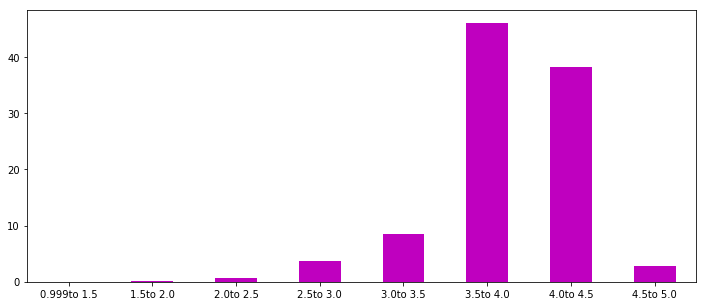

In [22]:
out = pd.cut(df1["Mean Rating"], bins=[1.0,1.5,2,2.5,3,3.5,4,4.5,5], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="m", figsize=(12,5))
ax.set_xticklabels([str(c)[1:-1].replace(",","to") for c in out.cat.categories])
plt.show()

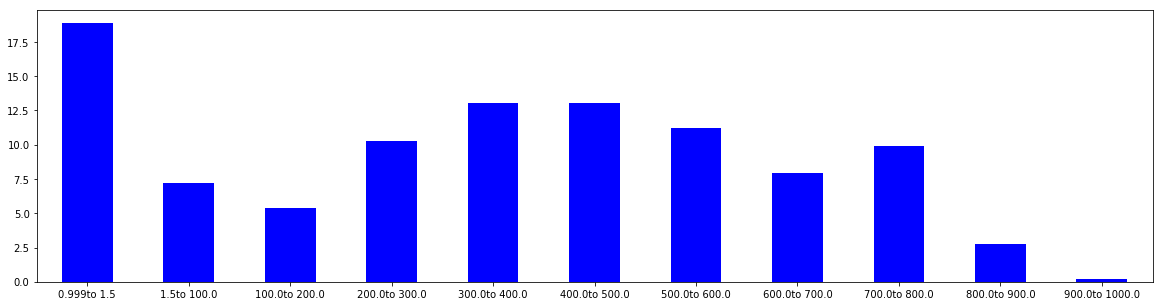

In [23]:
out = pd.cut(df1["cost"], bins=[1.0,1.5,100,200,300,400,500,600,700,800,900,1000], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(20,5))
ax.set_xticklabels([str(c)[1:-1].replace(",","to") for c in out.cat.categories])
plt.show()

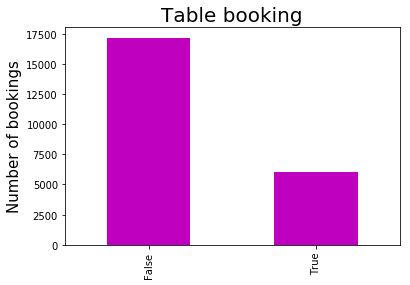

In [24]:
df1['book_table'].value_counts().plot.bar(color = 'm')
plt.title('Table booking', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.show()

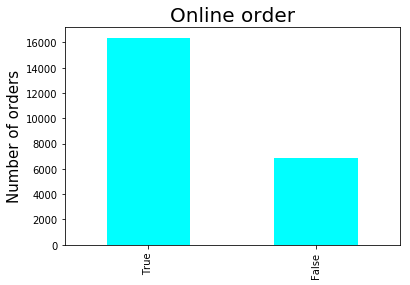

In [25]:
df1['online_order'].value_counts().plot.bar(color = 'cyan')
plt.title('Online order', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

NameError: name 'g' is not defined

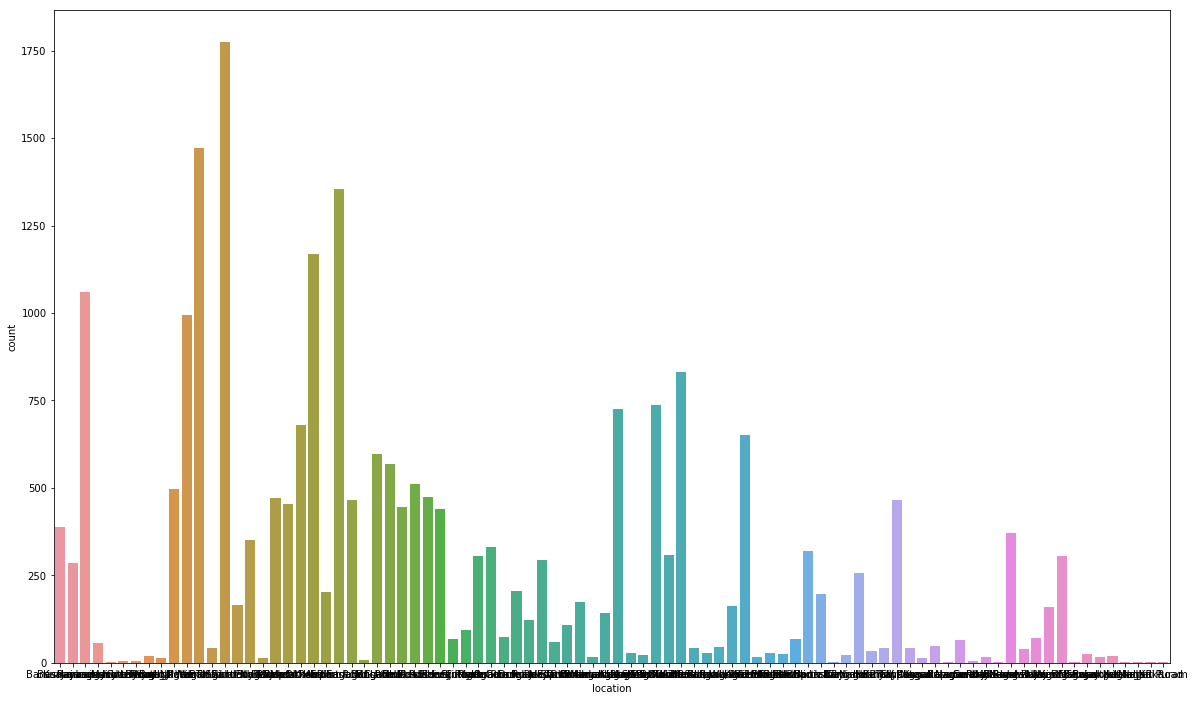

In [27]:
plt.figure(figsize=(20,12)) 
pl = sns.countplot(x="location",data=df1)
pl.set_xticklabels(g.get_xticklabels(),rotation=90)
pl
plt.title('locality',size = 20)

In [ ]:
plt.figure()
plt.scatter(df1["cost"],df1["Mean Rating"])
plt.show()

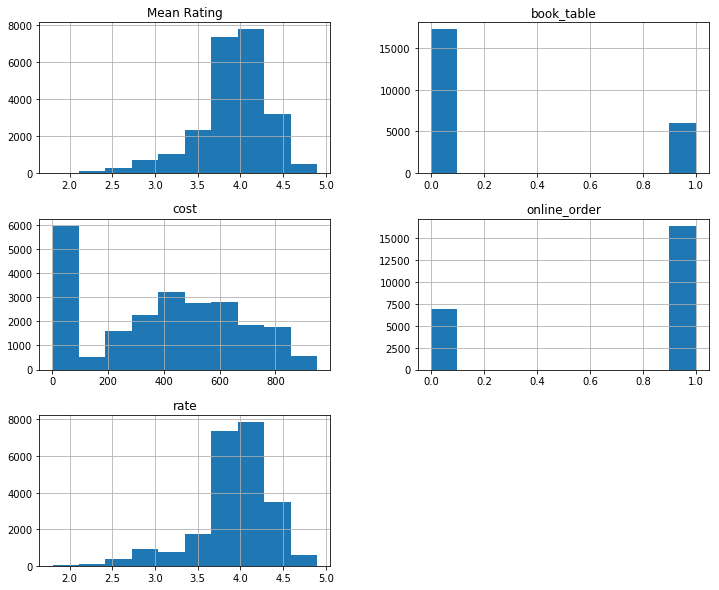

In [28]:
df1.hist(figsize=[12, 10])
plt.show()

k = df1["dish_liked"]
l1 = []
for i in k:
    l1.extend(i.split(','))
s = pd.Series(l1)
s.hist(figsize=[12, 50])
plt.show()

In [22]:
import tkinter as tk

In [28]:
from tkinter import *

root = Tk()
root.geometry("300x540")
root.title("Resturant Recommendation System")



def input_fn():
    global INPUT
    INPUT = inputtxt.get("1.0", "end-1c")
    Output.insert(END,df2)

    
    
l = Label(text = "Enter the resturant name")
inputtxt = Text(root, height = 10, width = 30, bg = "light yellow")
Output = Text(root, height = 60, width = 200, bg = "light cyan")
Display = Button(root, height = 2, width = 20, text ="Output", command = lambda:input_fn())
l.pack()
inputtxt.pack(pady=20)
Display.pack(pady=20)
Output.pack()
mainloop()



def recommendation(name, cosine_similarity = cosine_similarity):
    top_restaurants = []
    #k = indices[indices == name]
    #print(k.index)
    idx = indices[indices == name].index[0]
    #print(idx)
    top_res_des = pd.Series(cosine_similarity[idx]).sort_values(ascending=False)
    #print(top_res_des)
    top_30_res_indexes = list(top_res_des.iloc[0:31].index)
    #print(top_30_res_indexes)
    for each in top_30_res_indexes:
        top_restaurants.append(list(df_sample.index)[each])
    global df2
    df2 = pd.DataFrame(columns=['Mean Rating', 'cost'])
    for each in top_restaurants:
        df2 = df2.append(pd.DataFrame(df_sample[['Mean Rating', 'cost']][df_sample.index == each].sample()))
    df2 = df2.drop_duplicates(subset=['Mean Rating', 'cost'],keep=False)
    df2 = df2.sort_values(by='Mean Rating', ascending=False).head(10) 

    
    
recommendation(INPUT)
#recommendation('Pai Vihar')



In [ ]:
 #dframe = df2
    #txt.pack() 
    #class PrintToTXT(object):  
        #def write(self, s): 
            #txt.insert(END, s)
   # sys.stdout = PrintToTXT()
    #print(df2)